### Importanto libs e dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Caminhos dos arquivos
treino_caminho = "avila-tr.txt"
teste_caminho = "avila-ts.txt"

# Carregar as bases de treino e teste
treino_df = pd.read_csv(treino_caminho, delimiter=",", header=None)
teste_df = pd.read_csv(teste_caminho, delimiter=",", header=None)

# Concatenar as bases (ignorando os índices originais e criando um novo índice contínuo)
df = pd.concat([treino_df, teste_df], ignore_index=True)

#### -- Descrição das colunas:

- **intercolumnar distance**: distância entre duas colunas de uma página
- **upper margin**: distância entre a margem superior da página e a primeira linha de texto
- **lower margin**: distância entre a margem inferior da página e a última linha de texto
- **exploitation**: fração da coluna preenchida com tinta
- **row number**: número de linhas na coluna atual
- **modular ratio**: estimativa da dimensão do caracteres manuscritos
- **interlinear spacing**: distância entre duas linhas, em pixels
- **weight**: fração da linha preenchida com tinta. Parecida com a **exploitation**, mas para uma linha
- **peak number**: estimativa do número de caracteres em uma linha
- **modular ratio/ interlinear spacing**: razão entre os dois atributos anteriores

Todos os atributos são quantitativos (ou seja, numéricos). A variável alvo é chamada de "copista"; é o único atributo qualitativo do conjunto de dados. Cada copista é denotado por uma letra diferente.

#### -- Visualização inicial das primeiras linhas

In [187]:
# Lista com os novos nomes das colunas
names = [
    'intercolumnar distance',
    'upper margin',
    'lower margin',
    'exploitation',
    'row number',
    'modular ratio',
    'interlinear spacing',
    'weight',
    'peak number',
    'modular ratio/ interlinear spacing',
    'copista'  # Classe dos copistas
]

# Renomeando as colunas do DataFrame
treino_df.columns = names

In [57]:
treino_df.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,copista
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


---

### Análise exploratória dos dados:

#### -- Verificação de **valores nulos**

A primeira etapa da análise é explorar o conjunto de dados para entender como as informações estão distribuídas. Começamos verificando se há **valores nulos** e analisando as proporções entre as classes.

In [51]:
print('Valores nulos por coluna:')
print(np.sum(treino_df.isna(), axis = 0))

Valores nulos por coluna:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


O dataset não possui **valores nulos**

#### -- **Distribuição das classes**

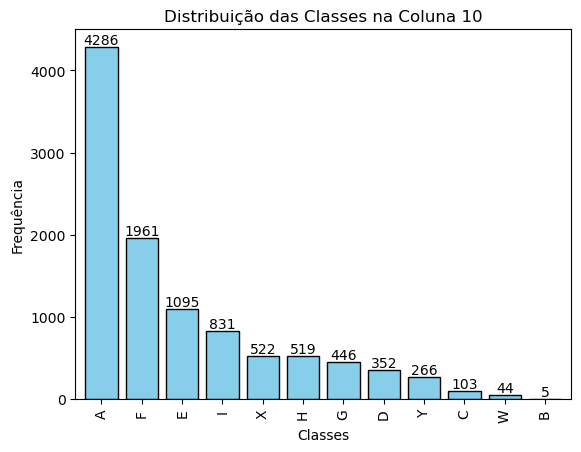

In [61]:
# Supondo que seu DataFrame seja df
# Exemplo de criação do gráfico de barras
ax = treino_df.iloc[:, 10].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição das Classes na Coluna 10')
plt.xlabel('Classes')
plt.ylabel('Frequência')

# Adicionando os rótulos de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Exibindo o gráfico
plt.show()

A distribuição das classes é claramente desequilibrada.

A documentação do conjunto de dados Avila indica que os dados já estão padronizados. Agora, vamos verificar essa questão

#### -- Normalização

A normalização é uma técnica de pré-processamento que busca tornar as distribuições dos atributos do conjunto de dados mais homogêneas e comparáveis entre si.

A normalização garante que nenhum atributo do conjunto de dados tenha uma influência desproporcional sobre os outros ao calcular distâncias entre pontos. Diversos algoritmos, como SVM e k-NN, podem se beneficiar bastante desse processo.

Ao contrário do que é afirmado na documentação, nem todos os atributos estão padronizados. A maioria das médias das colunas está relativamente próxima de zero, mas vários desvios padrão ultrapassam 1, chegando até 3.92 em alguns casos.

In [71]:
treino_df.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


Mesmo que a média de todas as colunas estejam próximas de zero, o que poderia indicar uma centralização dos dados, alguns pontos indicam o contrário:

1. Algumas colunas apresentam desvios padrão bem diferentes de 1, como:
    - Upper margin: 3.92
    - Interlinear spacing: 1.31
    - Modular ratio: 1.12

2. Os valores mínimos e máximos variam drasticamente entre os atributos, o que não deveria acontecer se os dados estivessem corretamente padronizados. É possível observar que **apenas a coluna row number possui um valor máximo dentro de um padrão de normalidade**. Além disso, todas as colunas possuem valores máximos e mínimos incoerentes com um conjunto de dados normalizado

Embora as médias estejam próximas de zero, os desvios padrão inconsistentes e as amplas faixas de valores mostram que os dados não foram completamente padronizados, contrariando o que foi afirmado na documentação. Isso pode afetar o desempenho de algoritmos sensíveis à escala, como SVM e k-NN.

Para entender melhor a distribuição dos dados da coluna mais desbalanceada (Upper Margin) um violin plot pode nos ajudar:

In [120]:
# função para plotar os gráficos de boxplot:
def single_boxplot(df, colname):
    plt.figure(figsize=(8, 3))  # Definição do tamanho do gráfico
    sns.boxplot(x=df[colname], orient='h', color="sandybrown", width=0.6, fliersize=5, linewidth=2)

    # Configuração do layout
    plt.xlabel(colname, fontsize=12)
    plt.title(f"Boxplot de {colname}", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.tight_layout()

    # Exibição do gráfico
    plt.show()

#### -- **Boxplot da coluna Upper Margin**

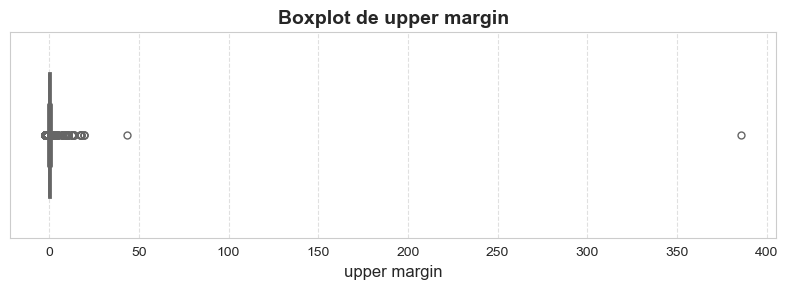

In [130]:
single_boxplot(treino_df,"upper margin")

O boxplot mostra claramente a presença de outliers extremos na coluna **upper margin**. A maioria dos dados está concentrada próxima de zero, com uma distribuição compacta, enquanto há pelo menos dois pontos muito distantes, sendo um próximo de 50 e outro próximo de 400.

#### -- **Boxplot da coluna Interliear spacing**

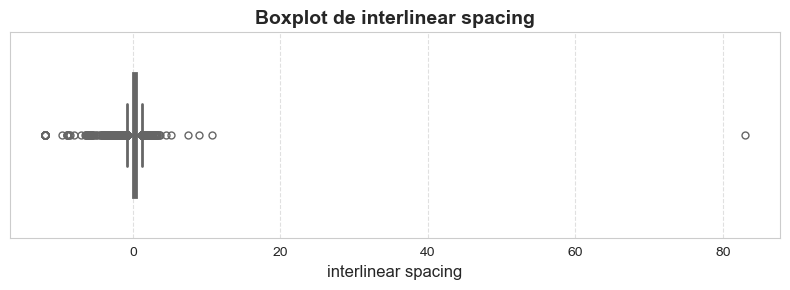

In [134]:
single_boxplot(treino_df,"interlinear spacing")

Novamente, podemos ver um outlier extremo, dessa vez na coluna **interlinear spacing**. Enquanto a maioria dos dados se concentra relativamente próximos de zero, um único ponto está em 83

#### --**Boxplot da coluna Modular ratio**

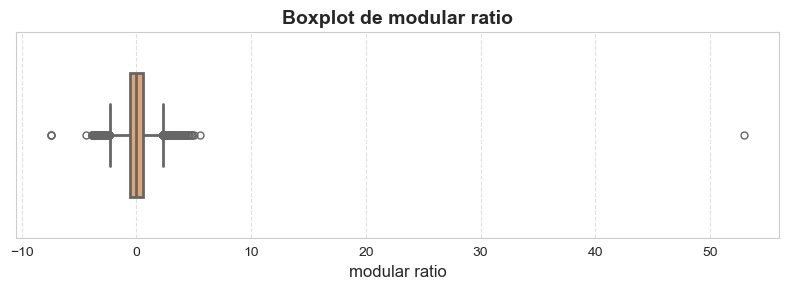

In [161]:
single_boxplot(treino_df,"modular ratio")

É possível perceber que as 2 últimas colunas analisadas (**upper margin e interlinear spacing**) estavam tão dispersas que a caixa dos quartis nem era visível.

No caso da coluna **modular ratio** ainda é possível observar um único ponto extremo em 53

#### -- **Boxplot das demais colunas**

Vamos agora observar os boxplots das demais colunas, para ter uma visão geral da distribuição dos dados em todo o conjunto:

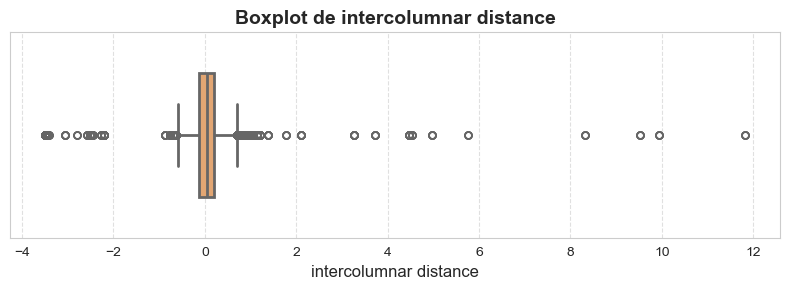

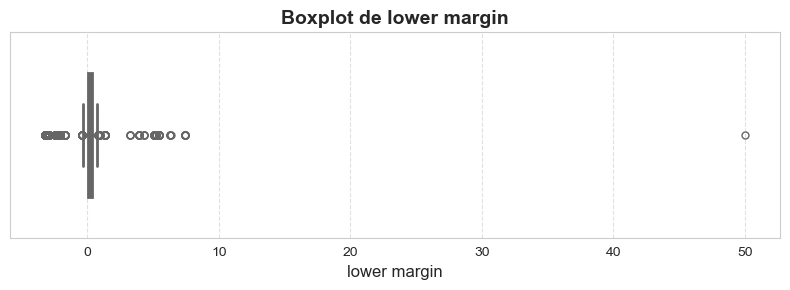

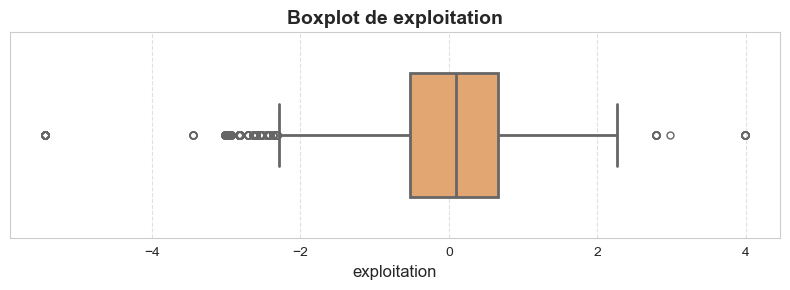

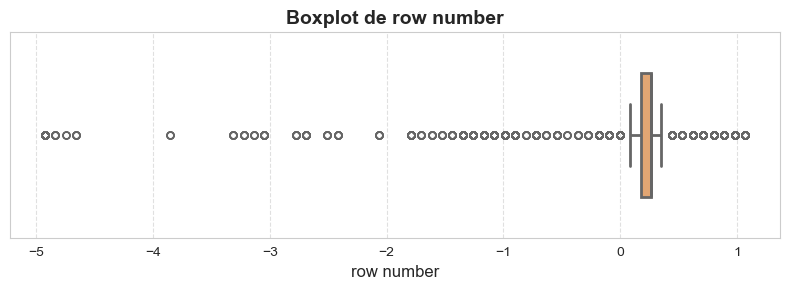

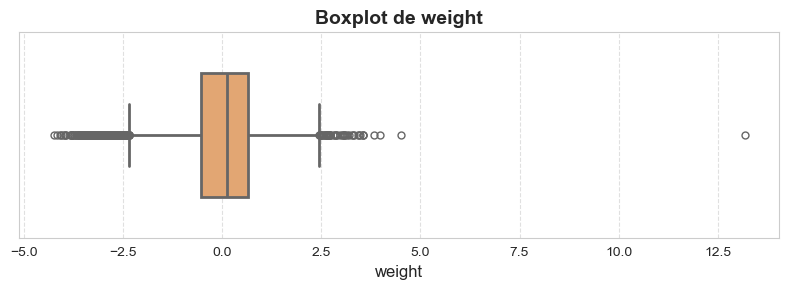

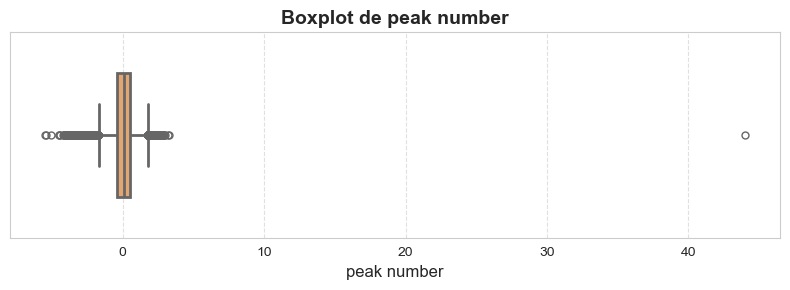

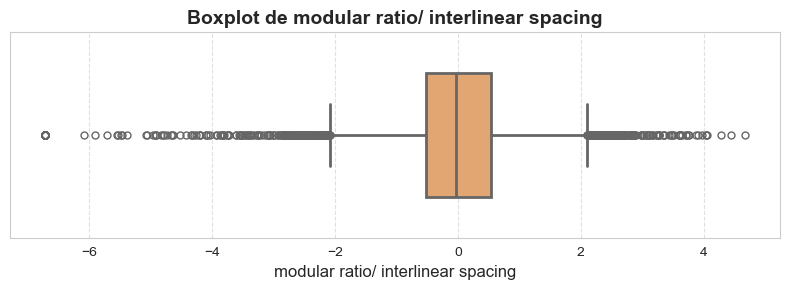

In [195]:
single_boxplot(treino_df,"intercolumnar distance")
single_boxplot(treino_df,"lower margin")
single_boxplot(treino_df,"exploitation")
single_boxplot(treino_df,"row number")
single_boxplot(treino_df,"weight")
single_boxplot(treino_df,"peak number")
single_boxplot(treino_df,"modular ratio/ interlinear spacing")

#### **-- Análise de outliers**

É perceptível que o conjunto de dados possui um número relevantes de outliers, vamos agora quantificar esses valores